In [ ]:
from google.colab import files
uploaded = files.upload()


Saving credit_card_customers.csv to credit_card_customers.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load data
df = pd.read_csv("credit_card_customers.csv")
print(df.head())


   CustomerID  Age  Gender  AnnualIncome  CreditLimit  Balance  MinPayment  \
0        1001   59    Male        130386        28524    32110         759   
1        1002   49    Male         57350         8636    18586         249   
2        1003   35  Female        123008        15916    25519         586   
3        1004   63    Male        124297         9809    32273         515   
4        1005   28  Female         55351        37201    22951         138   

   PaymentHistory  NumLatePayments  Tenure  
0            4995                3       9  
1            4743                1      14  
2            4970                1       5  
3            1207                8       4  
4            2714                4       6  


In [ ]:
# Encode Gender (Male = 0, Female = 1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Drop CustomerID (not useful for clustering)
df_features = df.drop(['CustomerID'], axis=1)

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)


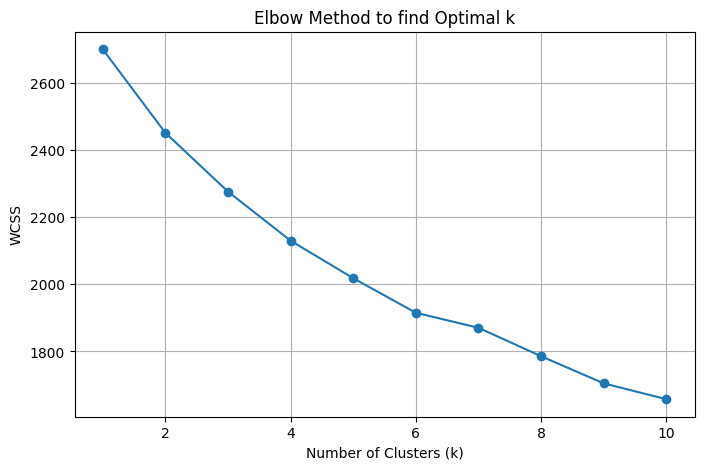

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method to find Optimal k')
plt.grid(True)
plt.show()


In [ ]:
# You can set k = 4 (example) based on elbow result
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Cluster Summary
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)


          CustomerID        Age    Gender  AnnualIncome   CreditLimit  \
Cluster                                                                 
0        1143.135135  47.932432  0.594595  75864.148649  26887.472973   
1        1162.890625  51.671875  0.531250  95621.234375  17662.531250   
2        1165.095890  33.178082  0.232877  82017.616438  25851.452055   
3        1135.741573  39.696629  0.730337  92896.617978  32446.629213   

              Balance  MinPayment  PaymentHistory  NumLatePayments    Tenure  
Cluster                                                                       
0        24036.378378  673.810811     2361.094595         2.000000  4.472973  
1        26225.625000  409.265625     1625.109375         6.234375  8.921875  
2        11316.602740  541.068493     1855.712329         5.342466  6.671233  
3        22311.865169  419.325843     3849.089888         4.685393  8.595506  


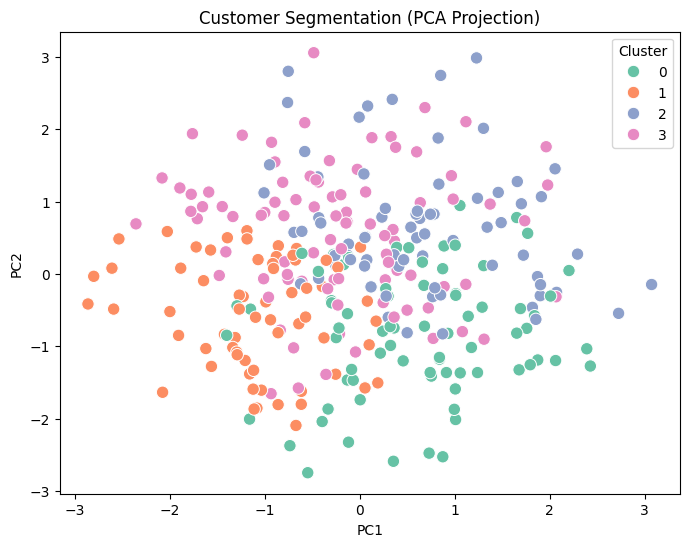

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)
df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]

# Scatter plot with cluster coloring
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=80)
plt.title("Customer Segmentation (PCA Projection)")
plt.show()


In [ ]:
df.to_csv("segmented_customers.csv", index=False)
files.download("segmented_customers.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>